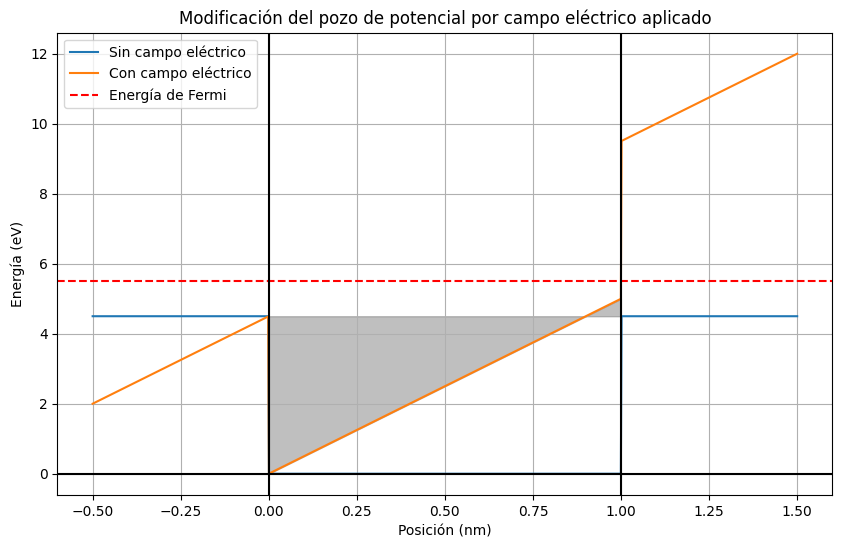

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Constantes físicas
e = 1.602e-19  # Carga del electrón en coulombs
hbar = 1.054e-34  # Constante de Planck reducida en J·s
m = 9.109e-31  # Masa del electrón en kg

# Parámetros del sistema
W = 4.5 * e  # Función de trabajo del metal en julios (ejemplo: 4.5 eV)
E_F = 5.5 * e  # Energía de Fermi en julios (ejemplo: 5.5 eV)
V_aplicado = -5  # Voltaje aplicado en voltios
d = 1e-9  # Ancho del pozo de potencial en metros
def potencial_sin_campo(x):
    """Potencial sin campo eléctrico aplicado."""
    return np.where((x >= 0) & (x <= d), 0, W)

def potencial_con_campo(x):
    """Potencial con campo eléctrico aplicado."""
    E = V_aplicado / d  # Campo eléctrico en V/m
    return np.where((x >= 0) & (x <= d), -e * E * x, W - e * E * x)
# Rango de posiciones
x = np.linspace(-0.5e-9, 1.5e-9, 1000)

# Potenciales
V_sin_campo = potencial_sin_campo(x)
V_con_campo = potencial_con_campo(x)
plt.figure(figsize=(10, 6))
plt.plot(x * 1e9, V_sin_campo / e, label='Sin campo eléctrico')
plt.plot(x * 1e9, V_con_campo / e, label='Con campo eléctrico')
plt.axhline(y=E_F / e, color='r', linestyle='--', label='Energía de Fermi')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.axvline(x=d * 1e9, color='k', linestyle='-')
plt.fill_between(x * 1e9, V_con_campo / e, W / e, where=(x >= 0) & (x <= d), color='gray', alpha=0.5)
plt.xlabel('Posición (nm)')
plt.ylabel('Energía (eV)')
plt.title('Modificación del pozo de potencial por campo eléctrico aplicado')
plt.legend()
plt.grid(True)
plt.show()
